In [1]:
# Dependencies
import requests
import json
import gmaps
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Google developer API key
from config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)

In [12]:
players = pd.read_csv('player_data.csv')
seasons = pd.read_csv('Seasons_stats.csv')
p = players.groupby('college').count()
playerByCollege = p.sort_values(by = 'name', ascending=False)
top20

,name
college,
University of Kentucky,99
"University of California, Los Angeles",91
University of North Carolina,87
University of Kansas,72
Duke University,71
Indiana University,60
University of Notre Dame,56
University of Louisville,55
St. John's University,51


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

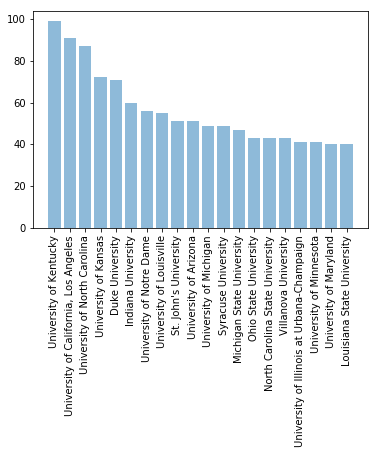

In [3]:
y_pos = np.arange(20)
plt.xticks(y_pos, top20.index)
plt.bar(y_pos, top20, align='center', alpha=0.5)
plt.xticks(rotation=90)

In [16]:
# Review top 20 schools
college_df = pd.DataFrame(playerByCollege['name'].head(20)).reset_index().rename(columns={'name':'count'})
college_df

,college,count
0,University of Kentucky,99
1,"University of California, Los Angeles",91
2,University of North Carolina,87
3,University of Kansas,72
4,Duke University,71
5,Indiana University,60
6,University of Notre Dame,56
7,University of Louisville,55
8,St. John's University,51
9,University of Arizona,51


In [17]:
college_df["Lat"] = ""
college_df["Lng"] = ""
college_df.head()

,college,count,Lat,Lng
0,University of Kentucky,99,,
1,"University of California, Los Angeles",91,,
2,University of North Carolina,87,,
3,University of Kansas,72,,
4,Duke University,71,,


In [18]:
# create a params dict that will be updated with new city each iteration
params2 = {"key": gkey}

# Loop through the cities_pd and run a lat/long search for each city
for index, row in college_df.iterrows():
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"

    city = row['college']

    # update address key value
    params2['address'] = city

    # make request
    cities_lat_lng = requests.get(base_url, params=params2)
    
    # print the cities_lat_lng url, avoid doing for public github repos in order to avoid exposing key
    # print(cities_lat_lng.url)
    
    # convert to json
    cities_lat_lng = cities_lat_lng.json()

    college_df.loc[index, "Lat"] = cities_lat_lng["results"][0]["geometry"]["location"]["lat"]
    college_df.loc[index, "Lng"] = cities_lat_lng["results"][0]["geometry"]["location"]["lng"]

# Visualize to confirm lat lng appear
college_df

,college,count,Lat,Lng
0,University of Kentucky,99,38.0307,-84.504
1,"University of California, Los Angeles",91,34.0689,-118.445
2,University of North Carolina,87,35.9049,-79.0469
3,University of Kansas,72,38.9543,-95.2558
4,Duke University,71,36.0014,-78.9382
5,Indiana University,60,39.1784,-86.5133
6,University of Notre Dame,56,41.7056,-86.2353
7,University of Louisville,55,38.2123,-85.7585
8,St. John's University,51,40.7221,-73.7942
9,University of Arizona,51,32.2319,-110.95


In [19]:
college_df.to_csv("output-latlong.csv")

In [21]:
# Store latitude and longitude in locations
locations = college_df[["Lat", "Lng"]]

# Fill NaN values and convert to float
count = college_df["count"].astype(float)

In [25]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=count, 
                                 dissipating=False, max_intensity=100,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

![08-Airport_Heatmap.png](../Images/08-Airport_Heatmap.png)

In [27]:
# BONUS
# Plost as a Hybrid map
fig = gmaps.figure(map_type="HYBRID")

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=count, 
                                 dissipating=False, max_intensity=100,
                                 point_radius=1)

fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

![08-Hybrid_Map.png](../Images/08-Hybrid_Map.png)

In [28]:
# BONUS
# Plot as a Terrain map
fig = gmaps.figure(map_type="TERRAIN")

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=count, 
                                 dissipating=False, max_intensity=100,
                                 point_radius=1)

fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

![08-Terrain_Map.png](../Images/08-Terrain_Map.png)